In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
!cp "/content/drive/My Drive/survey_results_public.csv" "data.csv"

In [3]:
!ls

data.csv  drive  sample_data


In [4]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
data_raw = pd.read_csv('data.csv')

In [7]:
data_raw.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [6]:
data_raw.head(10)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
5,6,I am a developer by profession,No,NaN,14,NaN,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,React.js,NaN,NaN,NaN,6,4
6,7,I am a developer by profession,Yes,NaN,18,Monthly,NaN,NaN,India,United States dollar,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,A lot more welcome now than last year,NaN,6,4
7,8,I am a developer by profession,Yes,36.0,12,Yearly,116000.0,116000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django;React.js;Vue.js,Flask,Just as welcome now as I felt last year,39.0,17,13
8,9,I am a developer by profession,No,30.0,20,NaN,NaN,NaN,Tunisia,United States dollar,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular.js,jQuery,Just as welcome now as I felt last year,50.0,6,4
9,10,I am a developer by profession,Yes,22.0,14,Yearly,25000.0,32315.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,Mathematics or statistics,Flask;jQuery,Flask;jQuery,Somewhat more welcome now than last year,36.0,8,4


In [8]:
#selecting a subset of columns with relevant data

selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    'NEWOtherComms',
    'SOAccount',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobSeek',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt',
    'ConvertedComp',
    'OrgSize',
    'PurchaseWhat'
]
survey_df = data_raw[selected_columns].copy()
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,DevType,WorkWeekHrs,JobSat,JobSeek,JobFactors,NEWOvertime,NEWEdImpt,ConvertedComp,OrgSize,PurchaseWhat
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,...,"Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,I am not interested in new job opportunities,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important,NaN,2 to 9 employees,NaN
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,...,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,I am not interested in new job opportunities,NaN,NaN,Fairly important,NaN,"1,000 to 4,999 employees",I have little or no influence
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,...,NaN,40.0,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary,NaN,20 to 99 employees,I have a great deal of influence
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,Very important,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,...,Senior executive/VP,NaN,NaN,NaN,NaN,NaN,Very important,NaN,NaN,NaN
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  NEWOtherComms           57205 non-null  object 
 14  SOAccount               56805 non-null

In [10]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors ='coerce')

In [11]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs,ConvertedComp
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000,3.475600e+04
mean,30.834111,15.476572,12.782051,8.869667,40.782174,1.037561e+05
std,9.585392,5.114081,9.490657,7.759961,17.816383,2.268853e+05
min,1.000000,5.000000,1.000000,1.000000,1.000000,0.000000e+00
25%,24.000000,12.000000,6.000000,3.000000,40.000000,2.464800e+04
50%,29.000000,15.000000,10.000000,6.000000,40.000000,5.404900e+04
75%,35.000000,18.000000,17.000000,12.000000,44.000000,9.500000e+04
max,279.000000,85.000000,50.000000,50.000000,475.000000,2.000000e+06


In [12]:
survey_df['invalid_age'] = np.where((survey_df['Age'] < survey_df['Age1stCode'])|(survey_df['Age']>100)|(survey_df['Age']<10),1,0)
survey_df['invalid_workhours'] = np.where((survey_df['WorkWeekHrs']>100),1,0)

In [13]:
survey_df = survey_df[~(survey_df['invalid_workhours']==1) & ~(survey_df['invalid_age']==1) ]

In [14]:
survey_df['Gender'].value_counts()

Man                                                            45852
Woman                                                           3832
Non-binary, genderqueer, or gender non-conforming                382
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           91
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [15]:
threshold_percent = 1
series = pd.value_counts(survey_df['Gender'])
mask = (series / series.sum() * 100).lt(threshold_percent)
survey_df = survey_df.assign(Gender_updated =np.where(survey_df['Gender'].isin(series[mask].index),'Others', survey_df['Gender']))

In [16]:
survey_df.Gender_updated.value_counts()

Man       45852
Woman      3832
Others      692
Name: Gender_updated, dtype: int64

In [17]:
top_countries = survey_df.Country.value_counts().head(5)
top_countries

United States     12466
India              8378
United Kingdom     3893
Germany            3878
Canada             2187
Name: Country, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


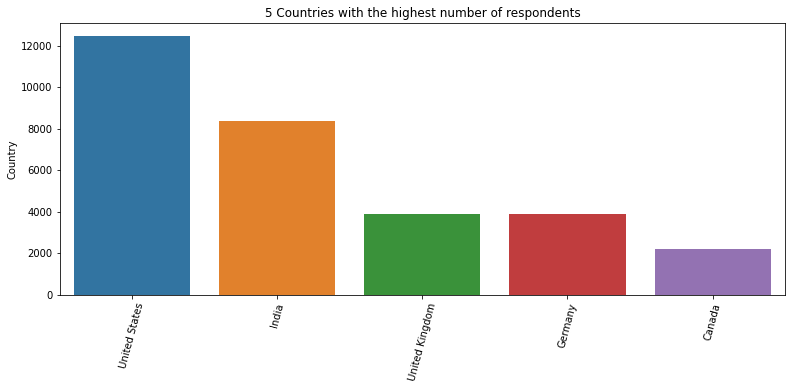

In [18]:
plt.figure(figsize=(13,5))
plt.xticks(rotation=75)
plt.title("5 Countries with the highest number of respondents")
sns.barplot(top_countries.index, top_countries)

(array([  208.,  2434.,  9183., 12004.,  8777.,  5600.,  3039.,  1761.,
         1039.,   623.,   334.,   144.,    75.]),
 array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]),
 <a list of 13 Patch objects>)

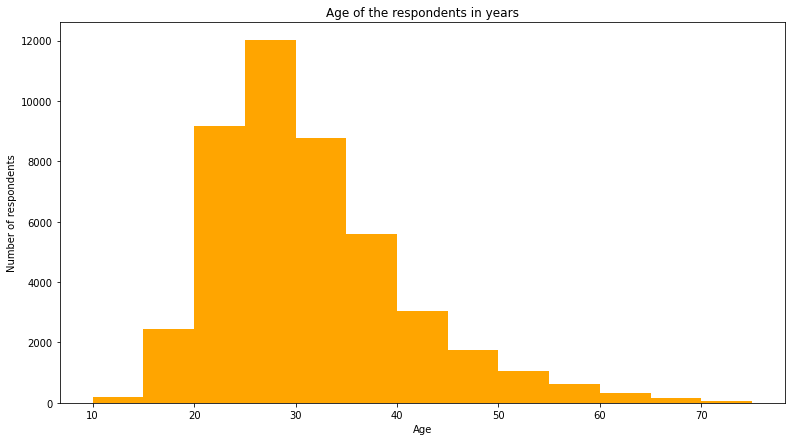

In [20]:
plt.figure(figsize=(13,7))
plt.title('Age of the respondents in years')
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age,  bins= np.arange(10,80,5), color= "Orange")

In [21]:
survey_df['AgeGroup'] = pd.cut(x=survey_df['Age']
                               , bins=[10,18,30,45,60,100]
                               , labels=['10-18 years', '18-30 years', '30-45 years', '45-60 years', 'Older than 60 years'])

In [22]:
survey_df['AgeGroup'].value_counts()

18-30 years            24402
30-45 years            15485
45-60 years             3042
10-18 years             1824
Older than 60 years      514
Name: AgeGroup, dtype: int64

In [23]:
gender_counts = survey_df.Gender_updated.value_counts()
gender_counts

Man       45852
Woman      3832
Others      692
Name: Gender_updated, dtype: int64

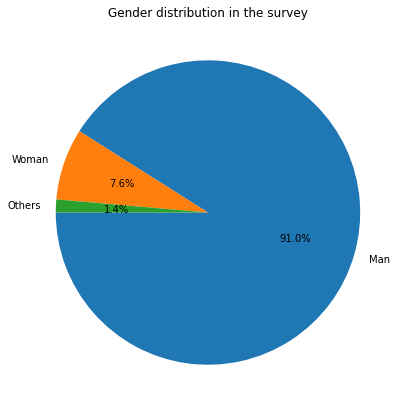

In [24]:
plt.figure(figsize=(13,7))
plt.title("Gender distribution in the survey")
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

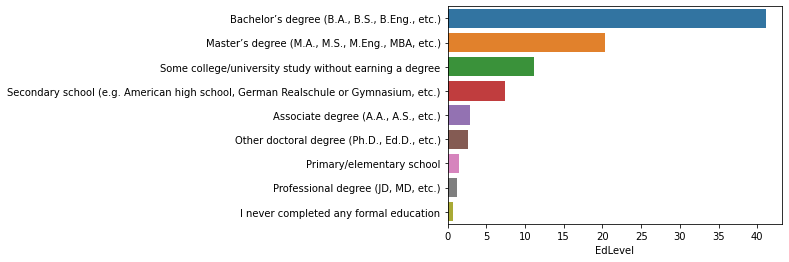

In [27]:
ed_counts = (survey_df.EdLevel.value_counts() * 100 / survey_df.shape[0]).round(2)

sns.barplot(x=ed_counts, y=ed_counts.index)

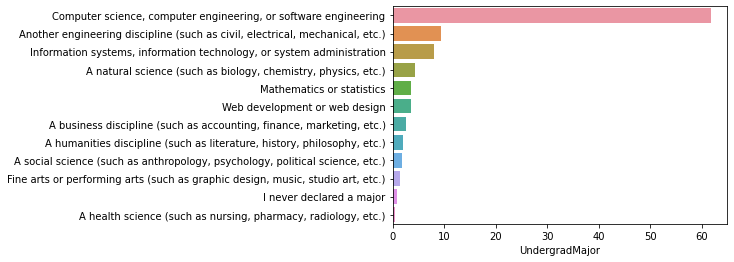

In [28]:
undergrad_counts = (survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()).round(2)

sns.barplot(x= undergrad_counts, y= undergrad_counts.index)

In [29]:
survey_df['degComp'] = (survey_df.UndergradMajor == 'Computer science, computer engineering, or software engineering')

survey_df['compdeg'] = survey_df['degComp'].map({True:'Computer Science', False: 'Not Computer Science'})

edimp_count= survey_df['NEWEdImpt'].value_counts()
edimp_count

Fairly important                      12619
Very important                        11827
Somewhat important                    11346
Not at all important/not necessary     7747
Critically important                   4731
Name: NEWEdImpt, dtype: int64

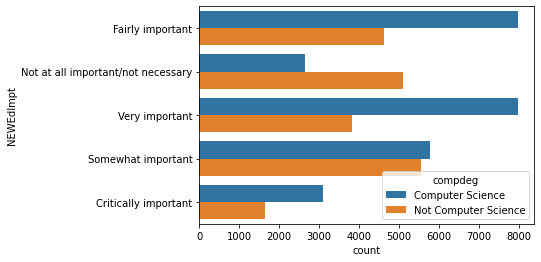

In [30]:
sns.countplot(y=survey_df.NEWEdImpt, hue = survey_df.compdeg)

In [31]:
survey_df.Employment.value_counts()

Employed full-time                                      45111
Student                                                  7783
Independent contractor, freelancer, or self-employed     5635
Not employed, but looking for work                       2340
Employed part-time                                       2209
Not employed, and not looking for work                    322
Retired                                                   243
Name: Employment, dtype: int64

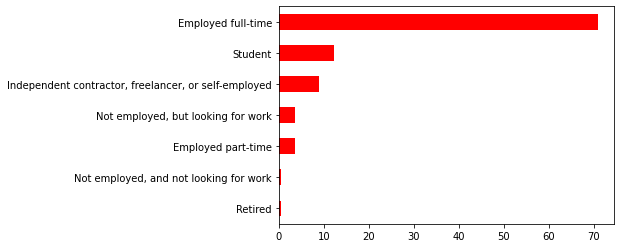

In [32]:
empcount = survey_df.Employment.value_counts(normalize = True, ascending = True) *100
empcount.plot(kind='barh', color='r')

In [41]:
groups = {
          'Enthusiast': ('Student', 'Not employed, but looking for work'),
          'Professional': ('Employed full-time', 'Employed part-time', 'Independent contractor, freelancer, or self-employed')
        }

empseries = pd.Series(survey_df.Employment)


from typing import Any

def membership_map(s: pd.Series, groups: dict,
                   fillvalue: Any=-1) -> pd.Series:
    groups = {x: k for k, v in groups.items() for x in v}
    return s.map(groups).fillna(fillvalue)

survey_df['EmploymentType'] = membership_map(empseries, groups, fillvalue='Other')

In [42]:
survey_df['EmploymentType'].value_counts()

Professional    52955
Enthusiast      10123
Other            1169
Name: EmploymentType, dtype: int64

In [43]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]


dev_type_df = split_multicolumn(survey_df.DevType)

In [44]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              27102
Developer, full-stack                            27017
Developer, front-end                             18207
Developer, desktop or enterprise applications    11722
Developer, mobile                                 9427
DevOps specialist                                 5941
Database administrator                            5687
Designer                                          5294
System administrator                              5210
Developer, embedded applications or devices       4719
Data or business analyst                          4001
Data scientist or machine learning specialist     3968
Developer, QA or test                             3919
Engineer, data                                    3721
Academic researcher                               3525
Educator                                          2909
Developer, game or graphics                       2773
Engineering manager                               2710
Product ma

In [46]:
new_languagesWorked_df = split_multicolumn(survey_df.LanguageWorkedWith)

Text(0.5, 0, 'Percentage')

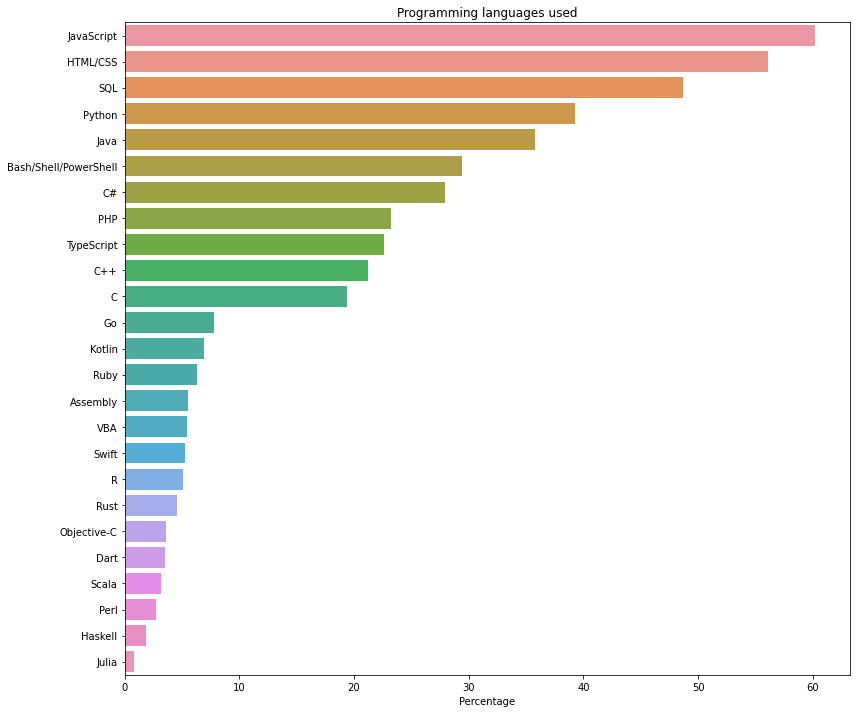

In [48]:
languages_percentage = new_languagesWorked_df.mean().sort_values(ascending=False) * 100

#plotting this in a horizontal bar chart

plt.figure(figsize = (13,12))
sns.barplot(x=languages_percentage, y = languages_percentage.index)
plt.title('Programming languages used')
plt.xlabel('Percentage')

Text(0.5, 0, 'Percentage')

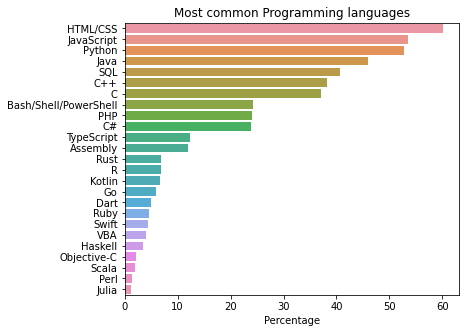

In [50]:
merged_languages = survey_df.join(new_languagesWorked_df)

students_merged_lang = merged_languages.loc[merged_languages['EmploymentType'] == 'Enthusiast']

prof_merged_lang = merged_languages.loc[merged_languages['EmploymentType'] == 'Professional']
new_students_merged_lang = students_merged_lang.loc[:,'C#':'Assembly']
new_students_merged_lang_percentage = new_students_merged_lang.mean().sort_values(ascending=False) * 100

plt.figure(figsize = (6,5))
sns.barplot(x=new_students_merged_lang_percentage, y = new_students_merged_lang_percentage.index)
plt.title('Most common Programming languages')
plt.xlabel('Percentage')

Text(0.5, 0, 'Percentage')

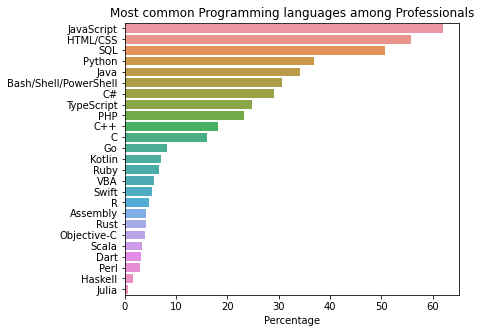

In [54]:
new_prof_merged_lang = prof_merged_lang.loc[:,'C#':'Assembly']
new_prof_merged_lang_percentage = new_prof_merged_lang.mean().sort_values(ascending=False) * 100

plt.figure(figsize = (6,5))
sns.barplot(x=new_prof_merged_lang_percentage, y = new_prof_merged_lang_percentage.index)
plt.title('Most common Programming languages among Professionals')
plt.xlabel('Percentage')

In [57]:
merged_dev_type = survey_df.join(dev_type_df)
merged_df_lang_dev = merged_dev_type.join(new_languagesWorked_df)

merged_df_lang_dev_df = merged_df_lang_dev.loc[merged_df_lang_dev['Developer, front-end'] == False]

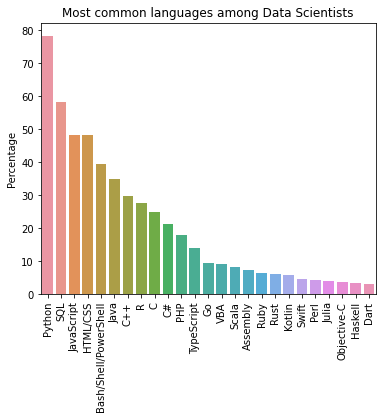

In [58]:
ds_merged_lang_df = merged_df_lang_dev.loc[merged_df_lang_dev['Data scientist or machine learning specialist'] == True]

new_ds_merged_lang_df = ds_merged_lang_df.loc[:,'C#':'Assembly']
new_ds_merged_lang_df_percentage = new_ds_merged_lang_df.mean().sort_values(ascending=False) * 100

plt.figure(figsize = (6,5))
sns.barplot(x=new_ds_merged_lang_df_percentage.index, y = new_ds_merged_lang_df_percentage);
plt.title('Most common languages among Data Scientists')
plt.ylabel('Percentage')
plt.xticks(rotation=90);

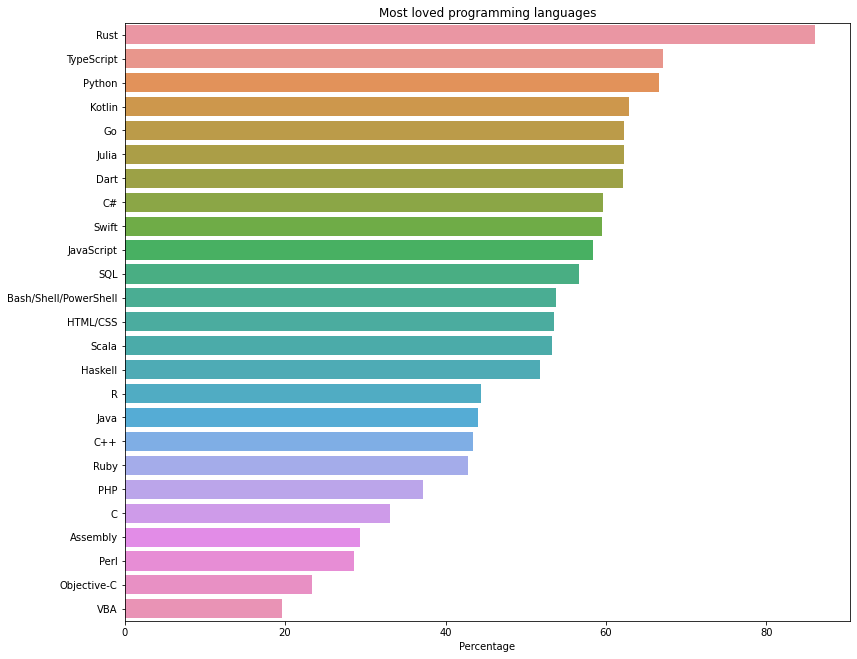

In [61]:
languages_loved_df = new_languagesWorked_df & ny_languages_interested_df
languages_loved_percentages = (languages_loved_df.sum() * 100/ new_languagesWorked_df.sum()).sort_values(ascending=False)

plt.figure(figsize=(13, 11))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index)
plt.title("Most loved programming languages");
plt.xlabel('Percentage');

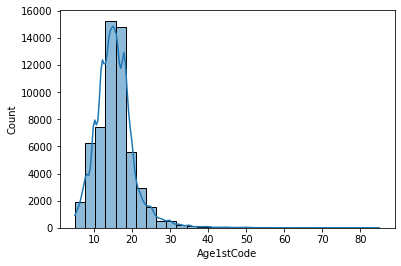

In [62]:

sns.histplot(x=survey_df.Age1stCode, bins=30, kde=True);

In [63]:
survey_df = survey_df[survey_df['YearsCode'].notna()]

In [64]:
survey_df.columns

Index(['Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor', 'Hobbyist',
       'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck', 'NEWOtherComms',
       'SOAccount', 'Employment', 'DevType', 'WorkWeekHrs', 'JobSat',
       'JobSeek', 'JobFactors', 'NEWOvertime', 'NEWEdImpt', 'ConvertedComp',
       'OrgSize', 'PurchaseWhat', 'invalid_age', 'invalid_workhours',
       'Gender_updated', 'AgeGroup', 'degComp', 'compdeg', 'EmploymentType'],
      dtype='object')

In [69]:
survey_df.groupby('Gender_updated').median()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs,ConvertedComp,invalid_age,invalid_workhours,degComp
Gender_updated,,,,,,,,,
Man,29.0,15.0,10.0,7.0,40.0,54049.0,0.0,0.0,1.0
Others,27.0,13.0,10.0,5.0,40.0,64000.0,0.0,0.0,0.0
Woman,28.0,16.0,8.0,5.0,40.0,54986.0,0.0,0.0,0.0


In [71]:
survey_df.groupby('EmploymentType').median()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs,ConvertedComp,invalid_age,invalid_workhours,degComp
EmploymentType,,,,,,,,,
Enthusiast,21.0,15.0,5.0,NaN,NaN,NaN,0.0,0.0,0.0
Other,34.0,16.0,10.0,5.0,40.0,12082.0,0.0,0.0,0.0
Professional,30.0,15.0,11.0,6.0,40.0,54049.0,0.0,0.0,1.0


In [72]:
survey_df.groupby('AgeGroup').median()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs,ConvertedComp,invalid_age,invalid_workhours,degComp
AgeGroup,,,,,,,,,
10-18 years,17.0,12.0,5.0,2.0,30.0,12972.0,0.0,0.0,0.0
18-30 years,25.0,15.0,8.0,4.0,40.0,38915.0,0.0,0.0,1.0
30-45 years,35.0,14.0,18.0,11.0,40.0,69864.0,0.0,0.0,1.0
45-60 years,50.0,14.0,35.0,25.0,40.0,94512.0,0.0,0.0,0.0
Older than 60 years,64.0,19.0,41.0,36.0,40.0,101704.0,0.0,0.0,0.0


In [73]:
survey_df.groupby('NEWLearn').median()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs,ConvertedComp,invalid_age,invalid_workhours,degComp
NEWLearn,,,,,,,,,
Every few months,26.0,15.0,8.0,5.0,40.0,45097.0,0.0,0.0,1.0
Once a decade,38.0,15.0,18.0,12.0,40.0,60360.0,0.0,0.0,0.0
Once a year,29.0,15.0,10.0,6.0,40.0,54972.0,0.0,0.0,1.0
Once every few years,33.0,15.0,14.0,9.0,40.0,64630.0,0.0,0.0,1.0


In [74]:
survey_df.groupby('NEWOvertime').median()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs,ConvertedComp,invalid_age,invalid_workhours,degComp
NEWOvertime,,,,,,,,,
Never,29.0,15.0,10.0,5.0,40.0,51670.0,0.0,0.0,1.0
Occasionally: 1-2 days per quarter but less than monthly,30.0,15.0,12.0,6.0,40.0,59454.0,0.0,0.0,1.0
Often: 1-2 days per week or more,30.0,15.0,12.0,6.0,45.0,49160.0,0.0,0.0,1.0
Rarely: 1-2 days per year or less,30.0,15.0,12.0,6.0,40.0,55087.0,0.0,0.0,1.0
Sometimes: 1-2 days per month but less than weekly,30.0,15.0,12.0,6.0,40.0,54049.0,0.0,0.0,1.0


In [76]:
survey_df.groupby('degComp').median()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs,ConvertedComp,invalid_age,invalid_workhours
degComp,,,,,,,,
False,29.0,15.0,9.0,6.0,40.0,54977.0,0.0,0.0
True,29.0,15.0,11.0,6.0,40.0,52996.0,0.0,0.0


In [77]:
survey_df.groupby('SOAccount').median()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs,ConvertedComp,invalid_age,invalid_workhours,degComp
SOAccount,,,,,,,,,
No,27.0,15.0,8.0,5.0,40.0,55000.0,0.0,0.0,1.0
Not sure/can't remember,29.0,15.0,10.0,6.0,40.0,55806.0,0.0,0.0,1.0
Yes,29.0,15.0,10.0,7.0,40.0,54049.0,0.0,0.0,1.0


In [78]:
survey_df.groupby('JobSat').median()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs,ConvertedComp,invalid_age,invalid_workhours,degComp
JobSat,,,,,,,,,
Neither satisfied nor dissatisfied,29.0,16.0,10.0,6.0,40.0,40000.0,0.0,0.0,1.0
Slightly dissatisfied,30.0,15.0,11.0,6.0,40.0,45546.0,0.0,0.0,1.0
Slightly satisfied,30.0,15.0,11.0,6.0,40.0,51887.0,0.0,0.0,1.0
Very dissatisfied,31.0,15.0,12.0,7.0,40.0,48622.0,0.0,0.0,1.0
Very satisfied,31.0,15.0,12.0,7.0,40.0,65000.0,0.0,0.0,1.0


In [80]:
survey_df[['Gender_updated','EmploymentType','AgeGroup','NEWLearn','NEWOvertime','degComp','SOAccount','JobSat','Age1stCode'
,'NEWOtherComms','ConvertedComp','OrgSize','PurchaseWhat'
,'YearsCode']]

,Gender_updated,EmploymentType,AgeGroup,NEWLearn,NEWOvertime,degComp,SOAccount,JobSat,Age1stCode,NEWOtherComms,ConvertedComp,OrgSize,PurchaseWhat,YearsCode
0,Man,Professional,NaN,Once a year,Often: 1-2 days per week or more,True,No,Slightly satisfied,13.0,No,NaN,2 to 9 employees,NaN,36.0
1,NaN,Professional,NaN,Once a year,NaN,True,Yes,Very dissatisfied,19.0,No,NaN,"1,000 to 4,999 employees",I have little or no influence,7.0
2,NaN,Other,NaN,Once a decade,NaN,False,Yes,NaN,15.0,No,NaN,NaN,NaN,4.0
3,Man,Other,18-30 years,Once a year,Occasionally: 1-2 days per quarter but less th...,True,Yes,Slightly dissatisfied,18.0,Yes,NaN,20 to 99 employees,I have a great deal of influence,7.0
4,Man,Professional,30-45 years,Once a year,NaN,True,Yes,NaN,16.0,Yes,NaN,NaN,NaN,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64448,NaN,Enthusiast,NaN,NaN,NaN,False,Yes,NaN,17.0,NaN,NaN,NaN,NaN,3.0
64451,NaN,Enthusiast,NaN,NaN,NaN,False,Yes,NaN,19.0,NaN,NaN,NaN,NaN,2.0
64453,NaN,Enthusiast,NaN,Once a year,NaN,False,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0
64454,NaN,Enthusiast,NaN,NaN,NaN,False,Not sure/can't remember,NaN,21.0,NaN,NaN,NaN,NaN,3.0


In [129]:
from sklearn.model_selection import train_test_split
X = survey_df[['Gender_updated','EmploymentType','AgeGroup','NEWLearn','NEWOvertime','degComp','SOAccount','JobSat','Age1stCode'
,'NEWOtherComms','ConvertedComp','OrgSize','PurchaseWhat']]
X = pd.get_dummies(X)
y = survey_df[['YearsCode']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [130]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39610 entries, 15298 to 64113
Data columns (total 45 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   degComp                                                               39610 non-null  bool   
 1   Age1stCode                                                            39610 non-null  float64
 2   ConvertedComp                                                         39610 non-null  float64
 3   Gender_updated_Man                                                    39610 non-null  uint8  
 4   Gender_updated_Others                                                 39610 non-null  uint8  
 5   Gender_updated_Woman                                                  39610 non-null  uint8  
 6   EmploymentType_Enthusiast                                             39610 non-null  uint

In [170]:
y_test['naive_pred'] = y_train['YearsCode'].median()

In [171]:
print("RMSE =", round(sm.mean_squared_error(y_test['YearsCode'], y_test['naive_pred'],squared=False), 2))

RMSE = 9.81


In [183]:
#Perform Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#X_sc = sc.fit_transform(X.fillna(0))
X = X.fillna(0)
#Splitting the data into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [184]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

In [185]:
from time import time

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [186]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

In [187]:
head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

KNeighborsRegressor()
	Training time: 0.099s
	Prediction time: 9.380s
	Explained variance: 0.3056210016720826
	Mean absolute error: 5.517229192436826
	R2 score: 0.3045730286897743



/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()
	Training time: 5.152s
	Prediction time: 0.042s
	Explained variance: 0.6248941968292385
	Mean absolute error: 4.077303082996023
	R2 score: 0.6248877557603038



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ExtraTreesRegressor()
	Training time: 24.346s
	Prediction time: 0.359s
	Explained variance: 0.539870145667706
	Mean absolute error: 4.44627938424061
	R2 score: 0.5396309789768695



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor()
	Training time: 20.273s
	Prediction time: 0.319s
	Explained variance: 0.5964462564483508
	Mean absolute error: 4.176576575564225
	R2 score: 0.5962741788681365

DecisionTreeRegressor()
	Training time: 0.417s
	Prediction time: 0.028s
	Explained variance: 0.2530031712375884
	Mean absolute error: 5.548403354710416
	R2 score: 0.25286006183678

LinearRegression()
	Training time: 0.137s
	Prediction time: 0.038s
	Explained variance: 0.5847547015907761
	Mean absolute error: 4.2887883572932815
	R2 score: 0.5847506661961589

Lasso()
	Training time: 0.175s
	Prediction time: 0.040s
	Explained variance: 0.2158809917811969
	Mean absolute error: 6.161635836784291
	R2 score: 0.2158549019694994

Ridge()
	Training time: 0.144s
	Prediction time: 0.042s
	Explained variance: 0.5847912643736821
	Mean absolute error: 4.28934396192624
	R2 score: 0.5847872418051178



In [188]:
from sklearn.model_selection import GridSearchCV

In [200]:
parameters = { 'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
              'learning_rate' : (0.05,1),
              'criterion' : ['squared_error', 'absolute_error'],
              'max_features' : ['sqrt', 'log2']
             }

In [ ]:
grid = GridSearchCV(GradientBoostingRegressor(),parameters)
model = grid.fit(X_train,np.ravel(y_train))
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1859: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1859: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1859: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  FutureWarning,


In [ ]:
model = GradientBoostingRegressor()
start = time()
model.fit(X_train, y_train)
train_time = time() - start
start = time()
y_pred = model.predict(X_test)
predict_time = time()-start    
print(model)
print("\tTraining time: %0.3fs" % train_time)
print("\tPrediction time: %0.3fs" % predict_time)
print("\tExplained variance:", explained_variance_score(y_test, y_pred))
print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
print("\tR2 score:", r2_score(y_test, y_pred))